# Adult Classification

## Description

In this project, we have data that represents a population with different demographic characteristics, following by their economic and social status.  
We are going to investigate the data and try to use supervised machine learning algorithms to find a relationship between the different features and the income of the person.

### Data

The data is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  
The data is split into two files: `adult.data` and `adult.test`, within the data folder. (currently not in the repo because of the size of the files)  
The data is in CSV format, with 14 features plus the target feature.
Here's the link to the [train](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) and [test](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test) data.

### Goal

The goal is to predict whether a person makes over 50K a year, based on the other features.

### Analysis

The process of the analysis is as follows:

1. Data exploration
2. Data cleaning
3. Feature engineering
4. Model selection
5. Model evaluation

## Load Data

In [118]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 5)

In [119]:
# load datasets
adults = pd.read_csv('../data/adult.data', delimiter=', ', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], engine='python')

test = pd.read_csv('../data/adult.test', delimiter=', ', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], skiprows=1, engine='python')

In [120]:
# inspect data
print(adults.shape)
adults.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Our dataset is quite large, we need to look at the data type of each column and the number of missing values.


In [121]:
# inspect data types
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

It seems that the types are correctly assigned.

In [122]:
# inspect missing values
adults.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Looks like there are no missing values, not at least those represented as Nan, we might have some missing values represented differently.  
We could group our features into three groups:

- demographic features
    - age
    - race
    - sex  
- economic features
    - education
    - education-num
    - occupation
    - hours-per-week
    - capital-gain
    - capital-loss  
- social features
    - fnlwgt
    - martial-status
    - relationship
    - native-country

## Explore Data

Let's start with an overview of summary statistics of the numerical features.

In [123]:
# summary statistics
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


It doesn't seem like there are any outliers in the data, but we can't be sure without looking at the distribution of the data.

Let's start off with the distribution of the age, and the histogram shows us that the age has a little impact on the type of income.

<AxesSubplot: xlabel='age', ylabel='Count'>

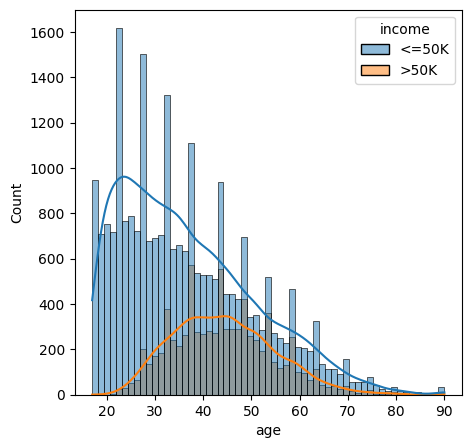

In [124]:
# histogram of age
sns.histplot(data=adults, x='age', hue='income', kde=True)

In the following graph, we see that the proportion of males is twice the proportion of females.

Text(0.5, 0, '')

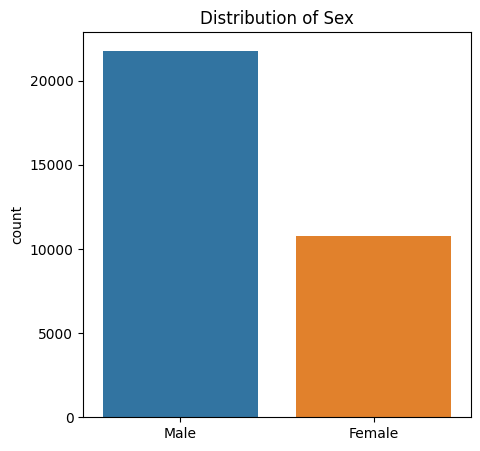

In [125]:
# distribution of sex
sns.countplot(data=adults, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('')

Next, we see that the vast majority of the population is white. with a significatively high proportion. This leads to the conlusion that race isn't a good feature to use in our model, it doesn't add enough information.

Text(0.5, 1.0, 'Distribution of Race')

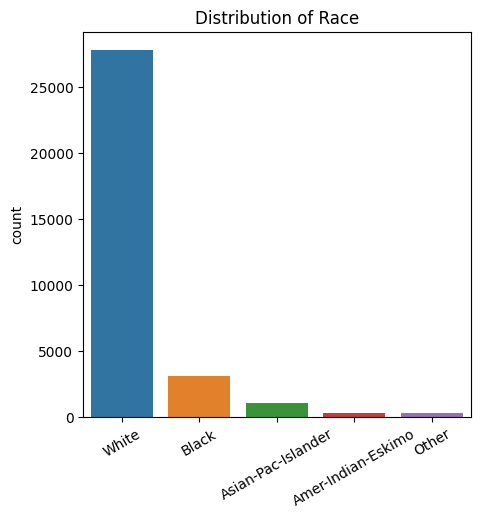

In [126]:
# distribution of race
sns.countplot(data=adults, x='race')
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Distribution of Race')

The following graph emphasizes the fact that race isn't useful in explaining the income of a person.

Text(0.5, 1.0, 'Race across Income')

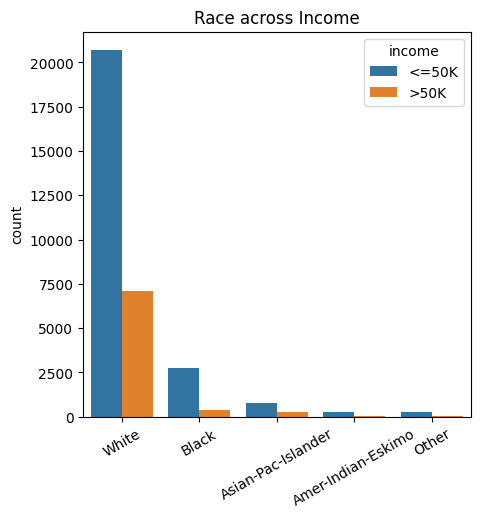

In [127]:
# distribution race across income
sns.countplot(data=adults, x='race', hue='income')
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Race across Income')

The next thing we do is performing an chi-square test to look at the association between education and education-num.  
The test shows that the two features are perfectly associated, so we can drop one of them as it represents the same information.

In [128]:
# relationship between education and education-num
from scipy.stats import chi2_contingency

Xtab = pd.crosstab(adults['education'], adults['education-num'])
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(chi2, pval)

488415.0 0.0


After trying to investigate the relationship between education level and income leve, we see that there is a very strong relationship between the two. More over, we see that the column that we have keep is education-num rather than education, because education-num is a numerical representation of the education level, so it'll keep the order of the education levels that impact income significantly as they get higher.

In [129]:
# relationship between education and income
# get the count of each eduction level and income level
df = adults.groupby(['education-num', 'income']).size().reset_index(name='count')

# get the percentage of each income level for each education level
df['percentage'] = np.round(df['count'] / df.groupby('education-num')['count'].transform('sum'), 3)
df.head()

,education-num,income,count,percentage
0,1,<=50K,51,1.000
1,2,<=50K,162,0.964
2,2,>50K,6,0.036
3,3,<=50K,317,0.952
4,3,>50K,16,0.048


Text(0.5, 1.0, 'Education across Income')

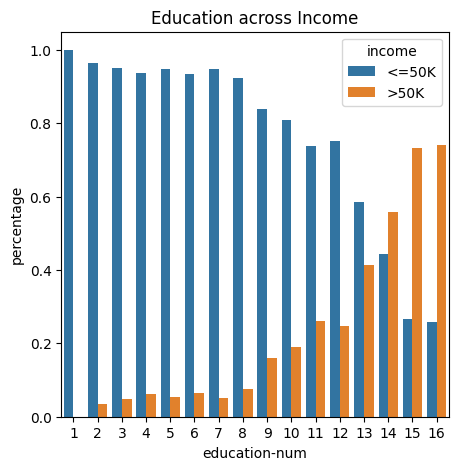

In [130]:
sns.barplot(data=df, x='education-num', y='percentage', hue='income')
plt.title('Education across Income')

In [131]:
# drop education column because of redundancy
adults.drop('education', axis=1, inplace=True)

As of the workclass feature, we see that there are some missing values, but we can't be sure if they are missing at random or not.  
The vast majority of people are working in the private sector.  
One interesting thing here is the existance of a '?' value denoting the existence of missing values for these two categories.

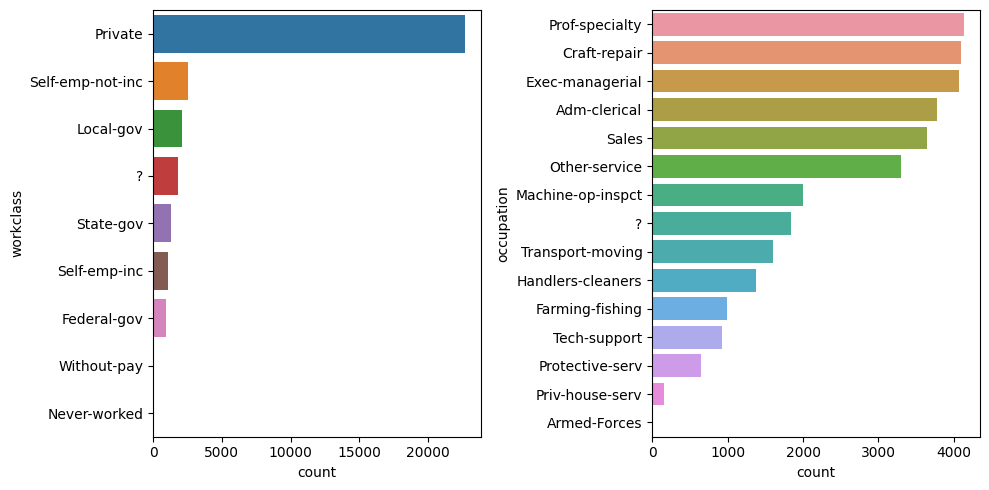

In [132]:
# distribution of workclass and occupation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='workclass', ax=ax[0], order=adults['workclass'].value_counts().index)
sns.countplot(data=adults, y='occupation', ax=ax[1], order=adults['occupation'].value_counts().index)
plt.tight_layout()

The next table shows that the missing values for the feature workclass are almost perfectly associated with missing values for the feature occupation.  
The chi square test shows us that the two features are associated, we can drop one of the columns, which could be occupation since the workclass feature is more informative.  
After separating our dataset on two parts, one in which the workclass and occupation are missing and the other in which they aren't, we saw in the histogram of age across income, that individuals with missing values have almost the same probability of having an income higher or lower than 50k, which is not the case with the other individuals from the second part of the dataset, this leads us to the conclusion that the missing values have an impact on the type of income, so we can't drop them, we can consider them as another class that we can call 'Unknown', and include in whatever model we try to work on.

In [133]:
# cross tabulation on workclass and occupation
workclass_occupation_cross = pd.crosstab(adults['workclass'], adults['occupation'])
workclass_occupation_cross

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,,
?,1836,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Federal-gov,0,317,9,64,180,8,23,14,35,0,175,28,14,68,25
Local-gov,0,283,0,146,214,29,47,12,193,0,705,304,7,38,115
Never-worked,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Private,0,2833,0,3195,2691,455,1273,1913,2740,149,2313,190,2942,736,1266
Self-emp-inc,0,31,0,106,400,51,2,13,27,0,160,5,291,3,27
Self-emp-not-inc,0,50,0,531,392,430,15,36,175,0,373,6,385,26,122
State-gov,0,253,0,56,189,15,9,13,124,0,414,116,11,57,41
Without-pay,0,3,0,1,0,6,1,1,1,0,0,0,0,0,1


In [134]:
# chi-square test
chi2, pval, dof, expected = chi2_contingency(workclass_occupation_cross)
chi2, pval

(41676.64797359809, 0.0)

In [135]:
# separating the dataset into two parts
new_adults1 = adults.loc[(adults.workclass == '?') & (adults.occupation == '?')]
new_adults2 = adults.loc[(adults.workclass != '?') & (adults.occupation != '?')]

Text(0.5, 0.98, 'Age across Income for Missing and Non Missing Workclass and Occupation')

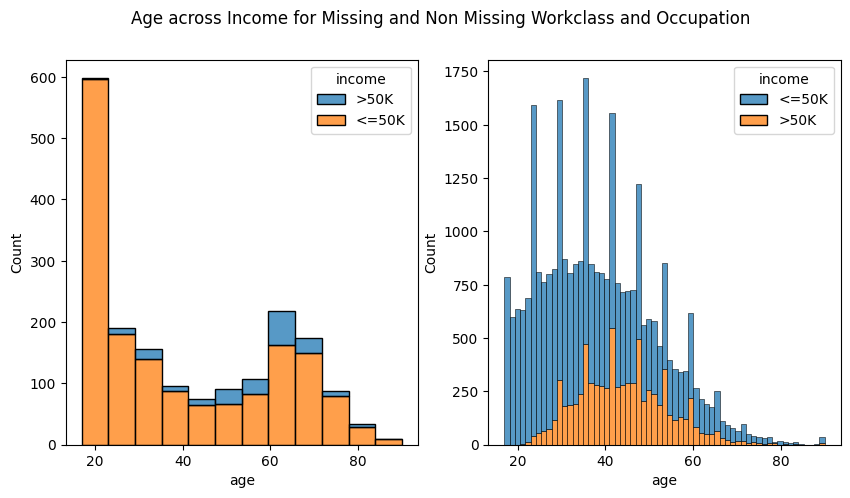

In [136]:
# distribution of age for new df
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=new_adults1, x='age', hue='income', multiple='stack', ax=ax[0])
sns.histplot(data=new_adults2, x='age', hue='income', multiple='stack', ax=ax[1])
plt.suptitle('Age across Income for Missing and Non Missing Workclass and Occupation')

In [137]:
# changing label name for workclass value of '?' to 'Unknown'
adults.loc[adults.workclass == '?', 'workclass'] = 'Unknown'

Next, we see that the vast majority of people are working in the United States, so we can drop this feature as it doesn't add any information.

In [138]:
# country of origin
adults['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [139]:
adults.drop('native-country', axis=1, inplace=True)

From analyzing the capital-gain and capital-loss features, we see that more than 75% of our data has the value of 0, and the rest corresponds to outliers. However, when we look at the distribution of the other data points that actually doesn't have a null value in either feature, we see that these columns have impact on the type of income of the person. 
People with a high capital gain tend to have a high income, the same goes for people with a high capital loss.  
If we want to build our model using these features, we need to use scaling or normalization, as the scale of the data is very different.

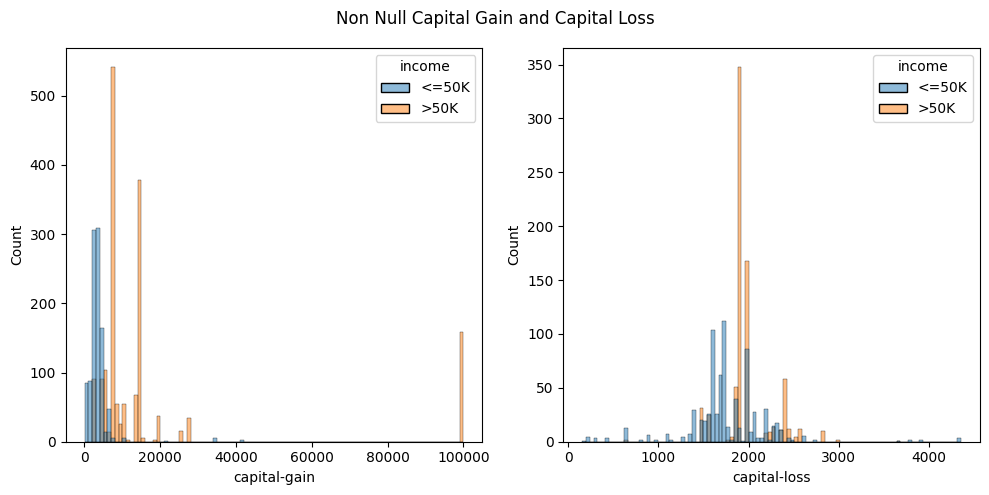

In [140]:
# capital gain and capital loss in subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=adults.loc[adults['capital-gain'] != 0], x='capital-gain', hue='income', ax=ax[0], bins=100)
sns.histplot(data=adults.loc[adults['capital-loss'] != 0], x='capital-loss', hue='income', ax=ax[1], bins=100)
plt.suptitle('Non Null Capital Gain and Capital Loss')
plt.tight_layout()

Now, examining the fnlwgt column, we see that its distribution is similar across each class of the target feature, meaning that there is no association between the two, we can then drop the fnlwgt feature.

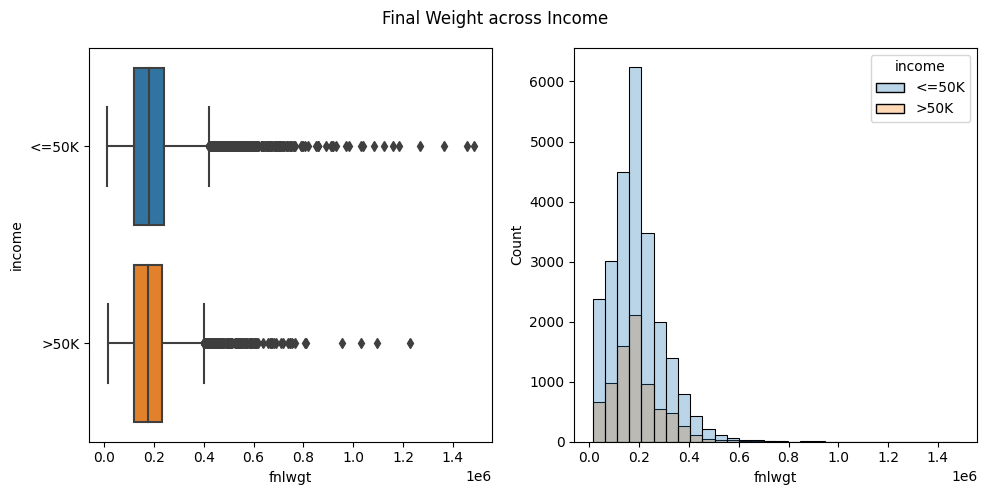

In [141]:
# association between fnlwgt and income
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=adults, x='fnlwgt', y='income', ax=ax[0])
sns.histplot(data=adults, x='fnlwgt', hue='income', ax=ax[1], bins=30, alpha=0.3)
plt.suptitle('Final Weight across Income')
plt.tight_layout()

Next, we look at the distribution of marital status and relationship, we see that there might be a relationship between the two categories.  
In addition, looking at these features across the income, we see that these columns have a certain impact on the target feature.

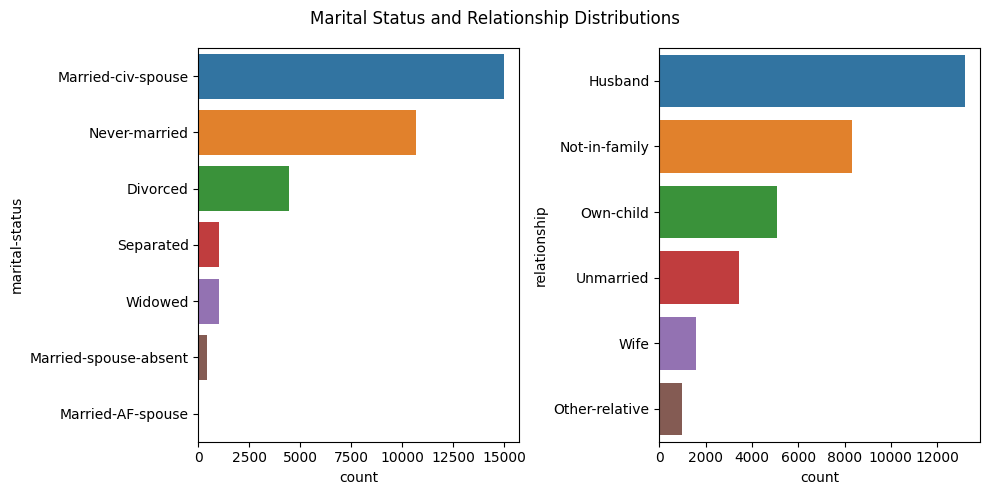

In [142]:
# marital status and relationship
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='marital-status', order=adults['marital-status'].value_counts().index, ax=ax[0])
sns.countplot(data=adults, y='relationship', order=adults['relationship'].value_counts().index, ax=ax[1])
plt.suptitle('Marital Status and Relationship Distributions')
plt.tight_layout()

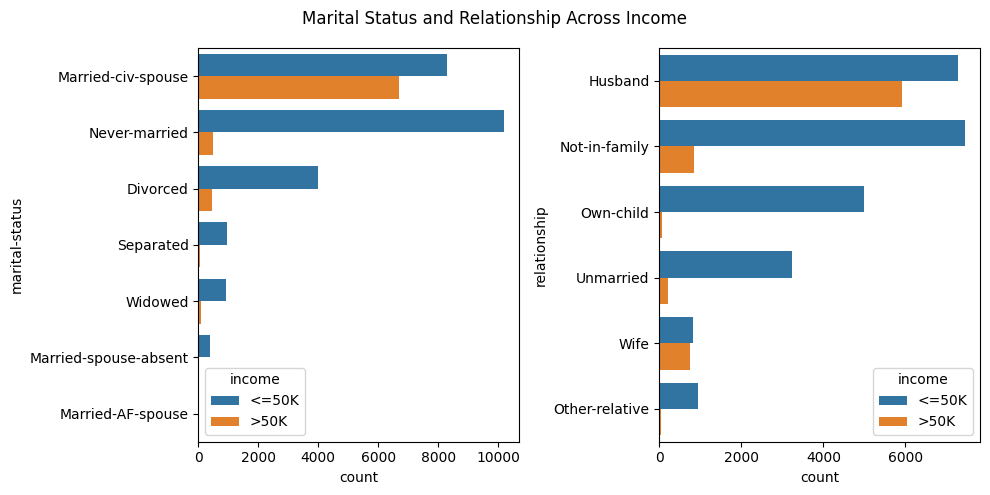

In [143]:
# marital status and relationship
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='marital-status', hue='income', order=adults['marital-status'].value_counts().index, ax=ax[0])
sns.countplot(data=adults, y='relationship', hue='income', order=adults['relationship'].value_counts().index, ax=ax[1])
plt.suptitle('Marital Status and Relationship Across Income')
plt.tight_layout()

In order to determine whether any association exists between relationship and marital status, we perform a chi-square test.  
The result of the test shows that there is a strong association between the two features, so we can drop one of them.

In [144]:
# chi-square test
Xtab = pd.crosstab(adults['relationship'], adults['marital-status'])
chi2, pval, dof, expected = chi2_contingency(Xtab)
chi2, pval

(38765.19804112144, 0.0)

## Build Model

After we have explored our datasets, and saw the impact that each feature has on the target feature, we can start building our model. We will try to use the following classifiers:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors

For each model, we are going to evaluate the performance using the following metrics:

- Accuracy
- Precision
- Recall
- F1 Score

### Data Preprocessing

Before we start building our model, we need to preprocess our data, since some models like SVM, KNN and logistic regression require the data to be scaled, and some models like decision trees and random forests don't require scaling.  
Rememmber the columns that needs to be scaled are the following:

- age
- education-num
- hours-per-week
- capital-gain
- capital-loss

Note also that we need to encode the categorical features using the one-hot encoding method.  
Remember the categorical features are the following:

- workclass
- relationship

Of course, there are other features that are categorical we talked about dropping, we can still use them in our model and see if the results of the models will be better or not.

In [145]:
# import sklearn's submodules for preprocessing